# Exercise 1

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt

## 1. Test statistic

The test statistic for the Neyman-Pearson test is the log-likelihood ratio:

$$t = -2 \ln \frac{\mathcal{L} (x | H_1)}{\mathcal{L} (x | H_0)}$$

$$t = \sum_i (x_i - \mu_1)^2 - (x_i - \mu_0)^2$$

where $\mu_0 = 1$ and $\mu_1 = 1.5$ (and we have omitted $\sigma$ since $\sigma = 1$).

$$t = \sum_i 2 (\mu_0 - \mu_1) x_i + \mu_1^2 - \mu_0^2$$

$t$ follows a normal law of mean $\mu_t = N \times(2 \mu (\mu_0-\mu_1) + \mu_1^2 - \mu_0^2)$ and standard deviation $\sigma_t = \sigma \times \sqrt{N} \times 2 |\mu_0 - \mu_1| = \sqrt{N}$

In [2]:
def teststat(x, mu0, mu1):
    """
    define the test statistic: -2ln(L(H1)/L(H0))
    """
    t = sum([(xi-mu1)**2 - (xi-mu0)**2 for xi in x])
    return t

## 2. Test statistic distributions

In [3]:
def ts_dist(N, mu0, mu1, mutest, Ntoys):
    """
    Sample the test statistic under a given hypothesis.
    Return a list of values.
    
    Parameters:
    * N: number of measurements
    * mu0, mu1: hypotheses considered (parameters of the test statistic)
    * mutest: mu to be used to throw toys (mu=mu0 or mu=mu1)
    * Ntoys: number of times to sample the test statistic
    """
    dist = []
    for i in range(Ntoys):
        x = np.random.normal(mutest, 1, N)
        dist.append(teststat(x, mu0, mu1))
    
    return dist

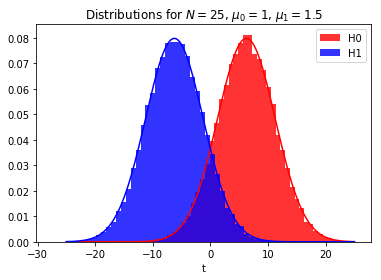

test stat distribution for H0 (mu0 = 1): mean = 6.248066075071048, std. dev. = 4.967351584754775
test stat distribution for H1 (mu1 = 1.5): mean = -6.229875926555265, std. dev. = 4.994210936818228


In [4]:
# parameters
N = 25
Ntoys = 40000
mu0 = 1
mu1 = 1.5

dist_H0 = ts_dist(N, mu0, mu1, mu0, Ntoys)
dist_H1 = ts_dist(N, mu0, mu1, mu1, Ntoys)

# also draw the analytic distributions
from scipy.stats import norm
tvals = np.linspace(-25,25,1000)
mu_t0 = N*(mu0-mu1)**2
mu_t1 = -N*(mu0-mu1)**2
sigma_t = np.sqrt(N)
dist_H0_a = norm.pdf(tvals, mu_t0, sigma_t)
dist_H1_a = norm.pdf(tvals, mu_t1, sigma_t)

fig, ax = plt.subplots()
# t distributions sampled using toys
ax.hist(dist_H0, bins=50, density=True, color='r', label='H0', alpha=0.8)
ax.hist(dist_H1, bins=50, density=True, color='b', label='H1', alpha=0.8)
# analytic pdf
ax.plot(tvals, dist_H0_a, color='r')
ax.plot(tvals, dist_H1_a, color='b')

ax.set_xlabel('t')
ax.set_title(r'Distributions for $N = {}$, $\mu_0 = {}$, $\mu_1 = {}$'.format(N, mu0, mu1))
ax.legend()
plt.show()
print("test stat distribution for H0 (mu0 = {}): mean = {}, std. dev. = {}".format(
    mu0, np.mean(dist_H0), np.std(dist_H0)
))
print("test stat distribution for H1 (mu1 = {}): mean = {}, std. dev. = {}".format(
    mu1, np.mean(dist_H1), np.std(dist_H1)
))

## 3. Critical region

Critical region: 

$$\int_w f(t | H_0) dt = \alpha$$

$$\int_w G(t; \mu_{t,0}, \sigma_t) dt = \alpha$$

$$w = ]-\infty, N (\mu_0-\mu_1)^2 + \sqrt{N} \times \Phi^{-1}(\alpha)]$$

where $\Phi^{-1}$ is the inverse of the c.d.f. of the normal distribution.

$$\beta = \int_{\Omega - w} f(t | H_1) dt$$

$$\beta = 1 - \Phi\left(\frac{w_\text{max} - \mu_{t,1}}{\sigma_t}\right)$$

In [5]:
# Analytically
from scipy.special import erf,erfinv

mu0 = 1
mu1 = 1.5
N = 25
alpha = 0.05

# correspondance between Normal cdf Phi and error function
def norm_Phi(x):
    return 0.5 * (1 + erf(x/np.sqrt(2)))
def norm_Phi_inv(x):
    return - np.sqrt(2) * erfinv(1 - 2*x)

# define functions to compute the critical region and the power of the test
def critical_region(N, mu0, mu1, alpha):    
    mu_t0 = N*(mu0-mu1)**2
    sigma_t = np.sqrt(N)
    wmax = mu_t0 + sigma_t * norm_Phi_inv(alpha)
    return wmax

def power_test(N, mu0, mu1, alpha):
    mu_t1 = -N*(mu0-mu1)**2
    sigma_t = np.sqrt(N)
    wmax = critical_region(N, mu0, mu1, alpha)
    beta = 1 - norm_Phi((wmax-mu_t1) / sigma_t)
    return beta

wmax = critical_region(N, mu0, mu1, alpha)
beta = power_test(N, mu0, mu1, alpha)
print("Analytically: for N = {}, alpha = {}".format(N, alpha))
print("The critical region is ]-infty, {}]".format(wmax))
print("The power of the test is beta = {}".format(beta))

Analytically: for N = 25, alpha = 0.05
The critical region is ]-infty, -1.9742681347573612]
The power of the test is beta = 0.1962350599845062


In [6]:
# numerically
alpha=0.05
wmax=np.quantile(dist_H0, alpha)
beta=len([t for t in dist_H1 if t>wmax]) / len(dist_H1)
print("Numerically: for N = {}, alpha = {}".format(N, alpha))
print("The critical region is ]-infty, {}]".format(wmax))
print("The power of the test is beta = {}".format(beta))

Numerically: for N = 25, alpha = 0.05
The critical region is ]-infty, -1.9711494442067632]
The power of the test is beta = 0.19705


## 4. ROC curve

We want the ROC curve: this is 1-alpha as a function of 1-beta.

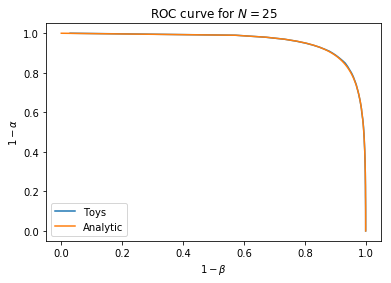

In [7]:
N = 25

# (re-)build the distributions if needed
#dist_H0 = ts_dist(N, mu0, mu1, mu0, Ntoys)
#dist_H1 = ts_dist(N, mu0, mu1, mu1, Ntoys)

# arrays initialisation
# ROC curve from toys
alphas = np.linspace(0,1,100)
xx = []
yy = []
# ROC curve from analytic calculation
xx_a = []

# loop
for alpha in alphas:
    # analytic
    wmax_a = critical_region(N, mu0, mu1, alpha)
    beta_a = power_test(N, mu0, mu1, alpha)
    
    # with toys
    wmax = np.quantile(dist_H0, alpha)
    beta = len([t for t in dist_H1 if t>wmax]) / len(dist_H1)
    
    xx.append(1-beta)
    yy.append(1-alpha)
    xx_a.append(1-beta_a)
    
# draw the ROC curve
fig, ax = plt.subplots()
ax.plot(xx, yy, label='Toys')
ax.plot(xx_a, yy, label='Analytic')
ax.set_xlabel(r'$1-\beta$')
ax.set_ylabel(r'$1-\alpha$')
ax.set_title(r'ROC curve for $N = {}$'.format(N))
ax.legend()
plt.show()

## 5. Minimum required sample size to have a contamination smaller than 0.1

In [8]:
# Analytically
N = 25
alpha = 0.05
beta_target = 0.1

beta = power_test(N, mu0, mu1, alpha)
while beta > beta_target:
    N = N+1
    beta = power_test(N, mu0, mu1, alpha)

print("The contamination for N = {} is beta = {}".format(N, beta))

The contamination for N = 35 is beta = 0.09456009558759604


In [9]:
# numerically
N = 25
beta_target = 0.1

wmax=np.quantile(dist_H0, alpha)
beta=len([t for t in dist_H1 if t>wmax]) / len(dist_H1)
while beta > beta_target:
    N = N+1
    dist_H0 = ts_dist(N, mu0, mu1, mu0, Ntoys)
    dist_H1 = ts_dist(N, mu0, mu1, mu1, Ntoys)
    wmax=np.quantile(dist_H0, alpha)
    beta=len([t for t in dist_H1 if t>wmax]) / len(dist_H1)

print("The contamination for N = {} is beta = {}".format(N, beta))

The contamination for N = 35 is beta = 0.09475
